In [21]:
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [22]:
from PIL import Image
path = '../images/256/'
# im = Image.open(path + 'waldo/1_1_1.jpg')
# im.to_thumb(128,128)

In [23]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#373) [Path('../images/256/notwaldo/15_1_0.jpg'),Path('../images/256/notwaldo/16_0_0.jpg'),Path('../images/256/notwaldo/20_0_2.jpg'),Path('../images/256/notwaldo/15_3_2.jpg'),Path('../images/256/notwaldo/16_2_2.jpg'),Path('../images/256/notwaldo/20_2_0.jpg'),Path('../images/256/notwaldo/5_2_2.jpg'),Path('../images/256/notwaldo/6_3_2.jpg'),Path('../images/256/notwaldo/5_0_0.jpg'),Path('../images/256/notwaldo/6_1_0.jpg')...]

In [24]:
failed = verify_images(filenames)
failed

(#0) []

In [25]:
img = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.4, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256)])

In [26]:
dls = img.dataloaders(path)

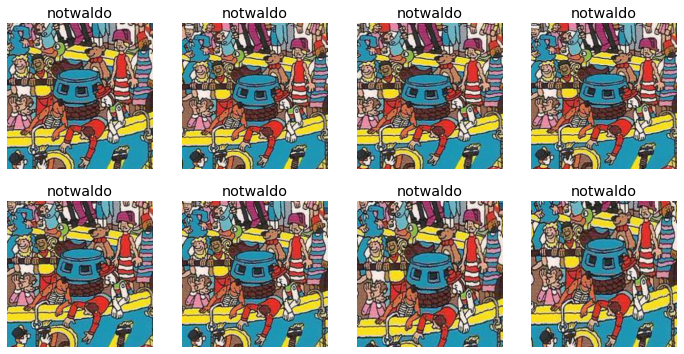

In [27]:
img = img.new(item_tfms=[RandomResizedCrop(256, min_scale=0.8)])
dls = img.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [28]:

metrics = [accuracy, error_rate]
our_out_of_the_box_model = cnn_learner(dls, vgg11_bn, loss_func=CrossEntropyLossFlat(), metrics=metrics)
our_out_of_the_box_model.fine_tune(5)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /Users/driaug/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:17<00:00, 29.6MB/s]


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.166692,1.267331,0.288591,0.711409,00:58


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.785405,0.981561,0.375839,0.624161,01:42
1,0.676075,0.614291,0.657718,0.342282,01:39
2,0.565724,0.477471,0.771812,0.228188,01:40


In [29]:
interp = ClassificationInterpretation.from_learner(our_out_of_the_box_model)
interp.plot_confusion_matrix()

In [ ]:
our_out_of_the_box_model.save('model')
our_out_of_the_box_model.export()